In [1]:
from glob import glob
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.observations.tracking import TrackEddiesObservations
from matplotlib import pyplot as plt
import numpy as np

In [2]:
N = 366 * 8

In [3]:
lavd_filenames = glob('data/eddies_med_lavd_allsat_dt2018_err070_forward/*/*.nc')
lavd_filenames.sort()
len(lavd_filenames)

2929

In [4]:
anticyclonic_ssh_filenames = glob('data/eddies_med_adt_allsat_dt2018_err070_filt0500_order01/*/A*.nc')
cyclonic_ssh_filenames = glob('data/eddies_med_adt_allsat_dt2018_err070_filt0500_order01/*/C*.nc')
anticyclonic_ssh_filenames.sort()
cyclonic_ssh_filenames.sort()
len(anticyclonic_ssh_filenames), len(cyclonic_ssh_filenames)

(9629, 9629)

In [5]:
%%time
lavd_eddies = EddiesObservations.concatenate([EddiesObservations.load_file(f) for f in lavd_filenames[:N]])

CPU times: user 33.2 s, sys: 248 ms, total: 33.5 s
Wall time: 33.5 s


In [6]:
print(lavd_eddies)

    | 85047 observations from 15706 to 18633 (2928 days, ~29 obs/day)
    |   Speed area      : 0.01 Mkm²/day
    |   Effective area  : 0.04 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :     100.00      0.00      0.00      0.00      0.00      0.00      0.00
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :      74.44     25.56      0.00      0.00      0.00      0.00      0.00      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :      21.17     63.62     13.00      2.10      0.10      0.00      0.00      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00  

/home/toto/dev/py-eddy-tracker/src/py_eddy_tracker/observations/observation.py:277: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


In [7]:
%%time
a_eddies = EddiesObservations.concatenate([EddiesObservations.load_file(f) for f in anticyclonic_ssh_filenames[:N]])
c_eddies = EddiesObservations.concatenate([EddiesObservations.load_file(f) for f in cyclonic_ssh_filenames[:N]])

CPU times: user 1min 7s, sys: 1.09 s, total: 1min 9s
Wall time: 1min 11s


In [8]:
print(a_eddies)

    | 168780 observations from 15706 to 18633 (2928 days, ~58 obs/day)
    |   Speed area      : 0.17 Mkm²/day
    |   Effective area  : 0.24 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      34.66     24.34     12.51      7.96      4.89     11.06      4.58
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.89     56.59     28.55      9.22      2.62      1.06      0.08      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.82     48.40     24.83     13.72      6.53      4.19      0.51      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00 

In [9]:
print(c_eddies)

    | 211253 observations from 15706 to 18633 (2928 days, ~72 obs/day)
    |   Speed area      : 0.22 Mkm²/day
    |   Effective area  : 0.28 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      37.75     27.46     14.08      8.28      4.41      7.28      0.74
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.89     56.50     26.80      9.35      3.47      1.84      0.15      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.80     49.25     26.28     13.11      5.80      3.35      0.41      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00 

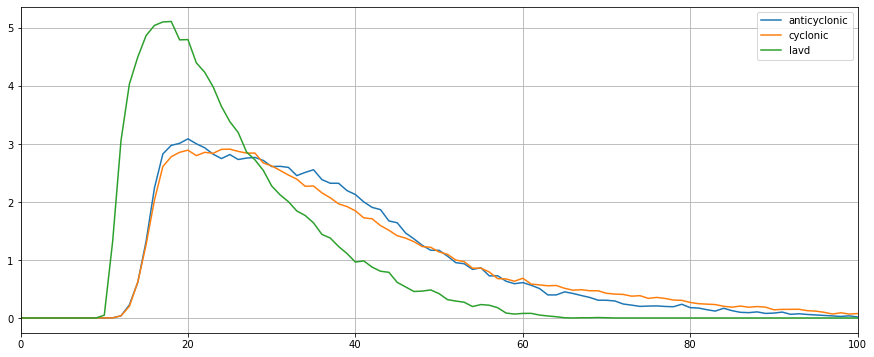

In [10]:
kw_hist = dict(varname='radius_s', x='radius_s', bins=np.arange(0,200,1) * 1e3, percent=True)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.plot(a_eddies.hist(**kw_hist), label='anticyclonic')
ax.plot(c_eddies.hist(**kw_hist), label='cyclonic')
kw_hist['x'] = 'radius_e'
kw_hist['varname'] = 'radius_e'
ax.plot(lavd_eddies.hist(**kw_hist), label='lavd')
ax.grid(), ax.set_xlim(0, 100)
_ = ax.legend()

In [11]:
kw_match = dict(cmin=.01, minimal_area=True)
kw_match = dict(cmin=.05)

In [12]:
%%time
all_s, all_s_mean, nb, t = list(), list(), list(), list()
a_eddies_ = a_eddies.copy()
a_eddies_.contour_lon_e[:] = a_eddies_.contour_lon_s[:]
a_eddies_.contour_lat_e[:] = a_eddies_.contour_lat_s[:]
for i_self, i_other, b0, b1 in a_eddies_.align_on(lavd_eddies):
    i_a_eddies, i_lavd_eddies, s = a_eddies_.match(lavd_eddies, i_self, i_other, **kw_match)
    all_s.append(s * 100)
    all_s_mean.append(s.mean() * 100)
    nb.append(s.size)
    t.append(b0)
all_s_a = np.concatenate(all_s)
all_s_a_mean = np.array(all_s_mean)
t = np.array(t)
nb_a = np.array(nb)
print(all_s_a.size)

35918
CPU times: user 2.99 s, sys: 67.9 ms, total: 3.06 s
Wall time: 3.11 s


In [13]:
%%time
all_s, all_s_mean, nb = list(), list(), list()
c_eddies_ = c_eddies.copy()
c_eddies_.contour_lon_e[:] = c_eddies_.contour_lon_s[:]
c_eddies_.contour_lat_e[:] = c_eddies_.contour_lat_s[:]
for i_self, i_other, b0, b1 in c_eddies_.align_on(lavd_eddies):
    i_c_eddies, i_lavd_eddies, s = c_eddies_.match(lavd_eddies, i_self, i_other, **kw_match)
    all_s.append(s * 100)
    all_s_mean.append(s.mean() * 100)
    nb.append(s.size)
all_s_c = np.concatenate(all_s)
all_s_c_mean = np.array(all_s_mean)
nb_c = np.array(nb)
print(all_s_c.size)

30656
CPU times: user 2.95 s, sys: 83.9 ms, total: 3.03 s
Wall time: 3.04 s


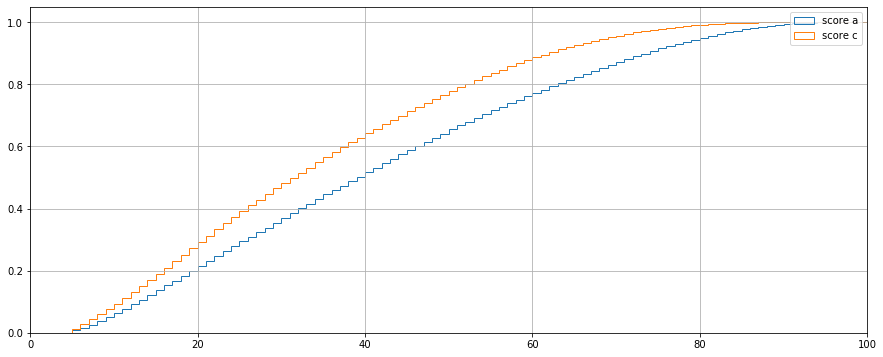

In [14]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
kw = dict(bins=np.arange(101), histtype='step', density=True, cumulative=True)
ax.hist(all_s_a, label='score a', **kw)
ax.hist(all_s_c, label='score c', **kw)
ax.grid()
ax.legend()
_ = ax.set_xlim(0,100)

22.737021857923498


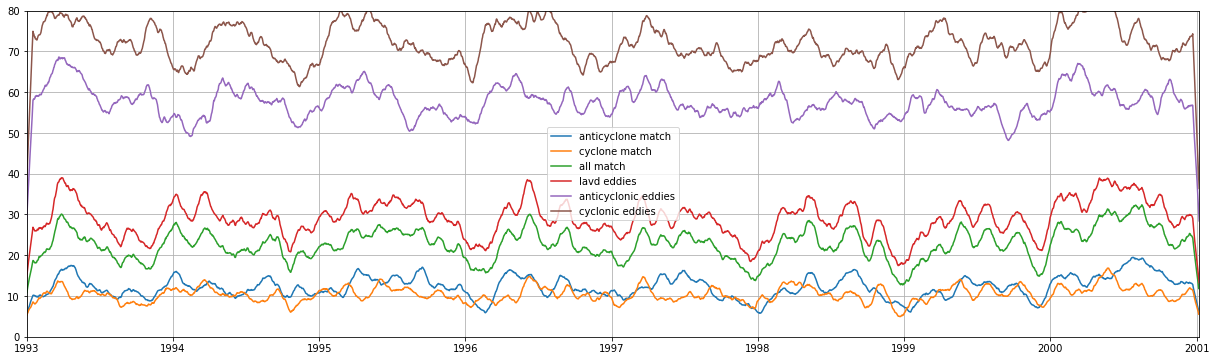

In [15]:
fig = plt.figure(figsize=(21,6))
ax = fig.add_subplot(111)
t_ = t.astype('timedelta64[D]') + np.datetime64('1950-01-01')
N_mean = 31
ax.plot(t_, np.convolve(nb_a, np.ones(N_mean) / N_mean, mode='same'), label = 'anticyclone match')
ax.plot(t_, np.convolve(nb_c, np.ones(N_mean) / N_mean, mode='same'), label = 'cyclone match')
ax.plot(t_, np.convolve(nb_a + nb_c, np.ones(N_mean) / N_mean, mode='same'), label = 'all match')
print((nb_a + nb_c).mean())
bins = np.arange(15000,35000)
nb = lavd_eddies.hist('time', 'time', bins=bins, nb=True)
ax.plot(bins[:-1].astype('timedelta64[D]') + np.datetime64('1950-01-01'), np.convolve(nb, np.ones(N_mean) / N_mean, mode='same'), label='lavd eddies')
nb = a_eddies.hist('time', 'time', bins=bins, nb=True)
ax.plot(bins[:-1].astype('timedelta64[D]') + np.datetime64('1950-01-01'), np.convolve(nb, np.ones(N_mean) / N_mean, mode='same'), label='anticyclonic eddies')
nb = c_eddies.hist('time', 'time', bins=bins, nb=True)
ax.plot(bins[:-1].astype('timedelta64[D]') + np.datetime64('1950-01-01'), np.convolve(nb, np.ones(N_mean) / N_mean, mode='same'), label='cyclonic eddies')
ax.grid()
ax.legend()
_ = ax.set_ylim(0,80), ax.set_xlim(t_.min(), t_.max())